# Building models - part 2

1. [SVM model - linear classification](#section1)
2. [Decision trees - non linear classfication](#section2)

    2.1 [Overfitting - prune max depth](#section2.1)    
    2.2 [Overfitting - prune max depth for another dataset](#section2.2)    
    2.3 [Overfitting - use random forest](#section2.3)    

3. [Accuracy](#section3) 

4. [Feature importance](#section4)

    4.1 [Petal vs. Sepal](#section4.1) 


In [3]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<div>
<img src="images/03-Machine-Learning-Learning-Curve.jfif" width="500"/>
</div>

<a id='section1'></a>
# 1. SVM model - linear classification

Load the data

In [8]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Prepare the data - split the data to training data and test data:

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

Define, fit, predict, evaluate

In [10]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

<a id='section2'></a>
# 2. Decision trees - nonlinear classification

Reminder: the model

In [11]:
from sklearn import tree
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

<a id='section2.1'></a>

## 2.1. Overfitting - prune max depth

Check the accuracy with different limits 

Organize the data - split to train and test

Define a function that builds a model according to a given tree depth, and returns it's accuracy

In [12]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

examine differen number of leaves:

In [13]:
for max_depth in [1, 2, 3]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.6
2 0.9555555555555556
3 0.9555555555555556


<a id='section2.2'></a>

## 2.2. Overfitting - prune max depth for another dataset

Load the data

In [14]:
from sklearn.datasets import load_digits
data = load_digits()

Prepare and split:

In [15]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Use the function of max depth:

In [16]:
for max_depth in [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.1925925925925926
2 0.3148148148148148
3 0.45925925925925926
4 0.575925925925926
5 0.6888888888888889
6 0.7814814814814814
7 0.8333333333333334
8 0.8518518518518519
9 0.8574074074074074
10 0.8555555555555555
11 0.8555555555555555
12 0.8574074074074074
13 0.8611111111111112
14 0.8611111111111112
15 0.8592592592592593
20 0.8592592592592593
25 0.8592592592592593


<a id='section2.3'></a>
## 2.3 Overfitting - use random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, random_state=0, criterion="gini")
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.9722222222222222

<a id='section3'></a>
# 3. Accuracy

In [18]:
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [19]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

Evaluation metric: a truth table

In [20]:
sk.metrics.confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

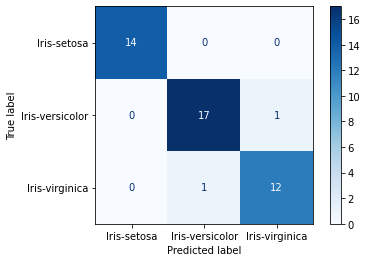

In [21]:
sk.metrics.plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [22]:

print(sk.metrics.classification_report(y_test, pred, target_names=dt.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section4'></a>
# 4. Feature importance

Which attributes were the most important in the training data?

In [23]:
dt.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [24]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


<a id='section4.1'></a>
### 4.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [25]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6


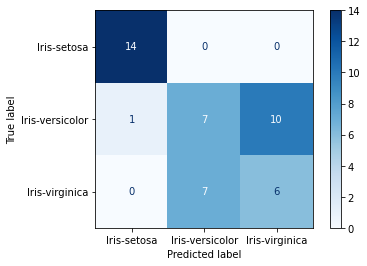

In [26]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [33]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

Now let's try a model with two features: one sepal and one petal:

In [ ]:
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=1)
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))